In [21]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
csv = pd.read_csv("../Data/Biral_Products_csv.csv", delimiter=",", header=0)
labels = csv.Gruppenbezeichnung
csv.drop(columns=["Bezeichnung", "Gruppenbezeichnung", "Beschreibung", "Anwendungsgebiet"], inplace=True)

data = np.array(csv)
print(data.shape)

(222, 15)


In [4]:
imputer_scaler = Imputer(missing_values="NaN", strategy="most_frequent", verbose=1)
data = imputer_scaler.fit_transform(data)
print(data.shape)

(222, 15)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33)

#### Classifier Vergleich mit allen Features

Naive Bayes:
Test Score: 72.973%

             precision    recall  f1-score   support

       BLUE       0.47      1.00      0.64        17
      GREEN       1.00      0.94      0.97        17
        RED       0.95      0.53      0.68        40

avg / total       0.85      0.73      0.74        74

Confusion matrix, without normalization
[[17  0  0]
 [ 0 16  1]
 [19  0 21]]


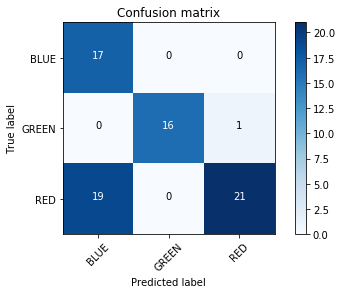

KNN:
Test Score: 81.081%

             precision    recall  f1-score   support

       BLUE       0.73      0.94      0.82        17
      GREEN       1.00      0.47      0.64        17
        RED       0.82      0.90      0.86        40

avg / total       0.84      0.81      0.80        74

Confusion matrix, without normalization
[[16  0  1]
 [ 2  8  7]
 [ 4  0 36]]


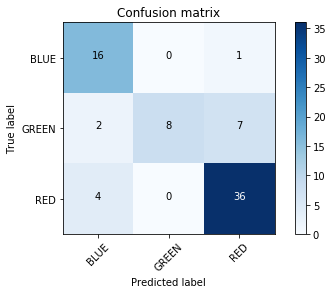

Random Forest:
Test Score: 98.649%

             precision    recall  f1-score   support

       BLUE       1.00      1.00      1.00        17
      GREEN       1.00      0.94      0.97        17
        RED       0.98      1.00      0.99        40

avg / total       0.99      0.99      0.99        74

Confusion matrix, without normalization
[[17  0  0]
 [ 0 16  1]
 [ 0  0 40]]


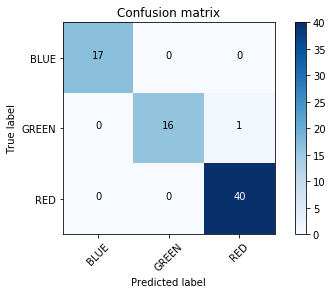

Decision Tree:
Test Score: 98.649%

             precision    recall  f1-score   support

       BLUE       1.00      1.00      1.00        17
      GREEN       1.00      0.94      0.97        17
        RED       0.98      1.00      0.99        40

avg / total       0.99      0.99      0.99        74

Confusion matrix, without normalization
[[17  0  0]
 [ 0 16  1]
 [ 0  0 40]]


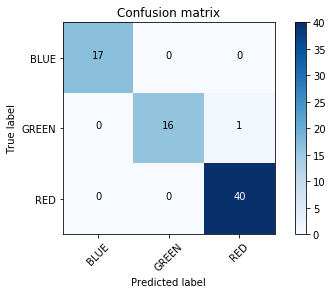

Linear SVM:
Test Score: 98.649%

             precision    recall  f1-score   support

       BLUE       1.00      1.00      1.00        17
      GREEN       1.00      0.94      0.97        17
        RED       0.98      1.00      0.99        40

avg / total       0.99      0.99      0.99        74

Confusion matrix, without normalization
[[17  0  0]
 [ 0 16  1]
 [ 0  0 40]]


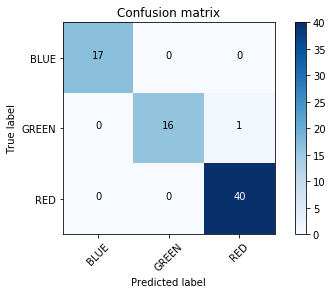

RBF SVM:
Test Score: 62.162%

             precision    recall  f1-score   support

       BLUE       1.00      0.29      0.45        17
      GREEN       1.00      0.06      0.11        17
        RED       0.59      1.00      0.74        40

avg / total       0.78      0.62      0.53        74

Confusion matrix, without normalization
[[ 5  0 12]
 [ 0  1 16]
 [ 0  0 40]]


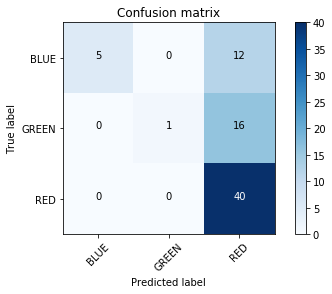

In [23]:
names = ["Naive Bayes",
         "KNN",
         "Random Forest",
         "Decision Tree",
         "Linear SVM",
         "RBF SVM"]

classifiers = [GaussianNB(),
               KNeighborsClassifier(n_neighbors=3),
               RandomForestClassifier(random_state=0, max_depth=3),
               DecisionTreeClassifier(max_depth=3),
               SVC(kernel="linear", C=0.025),
               SVC(gamma=2, C=1)]

for name, clf in zip(names, classifiers):
    clf_model = clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    print(f"{name}:")
    print("Test Score: {:.3%}\n".format(clf_model.score(X_test, y_test)))
    print(classification_report(y_test, clf_pred))
    
    cnf_matrix = confusion_matrix(y_test, clf_pred)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, np.unique(labels))
    plt.show()

#### Versuch mit Recursive Feature Elimination

Random Forest:
Test Score: 94.595%

             precision    recall  f1-score   support

       BLUE       1.00      0.82      0.90        17
      GREEN       1.00      0.94      0.97        17
        RED       0.91      1.00      0.95        40

avg / total       0.95      0.95      0.95        74

Features sorted by their rank:
[(1, 'Mediumtemperatur max.'), (1, 'Mediumtemperatur min.'), (1, 'pro 100 m Höhe'), (2, 'Leistung P min.'), (3, 'EEI-Wert'), (4, 'Nennweite'), (5, 'Nennstrom min.'), (6, 'bei   75°C Wassertemperatur'), (7, 'Nennweite G/DN'), (8, 'Nennstrom max.'), (9, 'Baulänge'), (10, 'Betriebsdruck max.'), (11, 'Förderhöhe H max.'), (12, 'Leistung P max.'), (13, 'Nettogewicht')]

Confusion matrix, without normalization
[[14  0  3]
 [ 0 16  1]
 [ 0  0 40]]


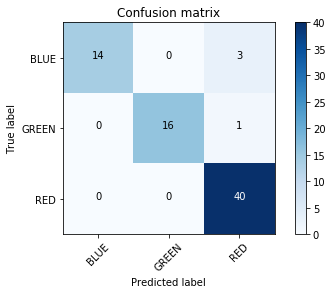

Decision Tree:
Test Score: 97.297%

             precision    recall  f1-score   support

       BLUE       1.00      0.94      0.97        17
      GREEN       0.94      0.94      0.94        17
        RED       0.98      1.00      0.99        40

avg / total       0.97      0.97      0.97        74

Features sorted by their rank:
[(1, 'Baulänge'), (1, 'Leistung P min.'), (1, 'pro 100 m Höhe'), (2, 'Nennweite G/DN'), (3, 'Nennstrom max.'), (4, 'Nennstrom min.'), (5, 'Leistung P max.'), (6, 'bei   75°C Wassertemperatur'), (7, 'EEI-Wert'), (8, 'Nettogewicht'), (9, 'Mediumtemperatur max.'), (10, 'Mediumtemperatur min.'), (11, 'Betriebsdruck max.'), (12, 'Förderhöhe H max.'), (13, 'Nennweite')]

Confusion matrix, without normalization
[[16  1  0]
 [ 0 16  1]
 [ 0  0 40]]


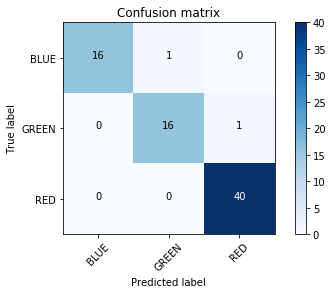

Linear SVM:
Test Score: 98.649%

             precision    recall  f1-score   support

       BLUE       1.00      1.00      1.00        17
      GREEN       1.00      0.94      0.97        17
        RED       0.98      1.00      0.99        40

avg / total       0.99      0.99      0.99        74

Features sorted by their rank:
[(1, 'Leistung P min.'), (1, 'Mediumtemperatur max.'), (1, 'Mediumtemperatur min.'), (2, 'Nettogewicht'), (3, 'Nennweite G/DN'), (4, 'Nennweite'), (5, 'Baulänge'), (6, 'pro 100 m Höhe'), (7, 'Betriebsdruck max.'), (8, 'Förderhöhe H max.'), (9, 'Nennstrom max.'), (10, 'bei   75°C Wassertemperatur'), (11, 'EEI-Wert'), (12, 'Nennstrom min.'), (13, 'Leistung P max.')]

Confusion matrix, without normalization
[[17  0  0]
 [ 0 16  1]
 [ 0  0 40]]


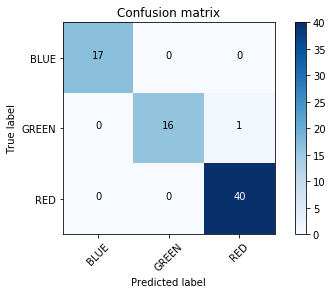

In [24]:
names = ["Random Forest",
         "Decision Tree",
         "Linear SVM"]

classifiers = [RandomForestClassifier(random_state=0, max_depth=3),
               DecisionTreeClassifier(max_depth=3),
               SVC(kernel="linear", C=0.025)]

for name, clf in zip(names, classifiers):
    selector = RFE(clf, n_features_to_select=3, step=1)
    selector.fit(X_train, y_train)
    clf_pred = selector.predict(X_test)
    print(f"{name}:")
    print("Test Score: {:.3%}\n".format(selector.score(X_test, y_test)))
    print(classification_report(y_test, clf_pred))
    print("Features sorted by their rank:")
    print(sorted(zip(map(lambda x: round(x, 4), selector.ranking_), csv.columns)))
    print()
    
    cnf_matrix = confusion_matrix(y_test, clf_pred)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, np.unique(labels))
    plt.show()